In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from datetime import datetime
import requests
from pprint import pprint
import matplotlib.pyplot as plt



# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.colorado.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.colorado.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

client = Socrata("data.colorado.gov", "YKIL3gl973fnPvtdQYaGHnNxA", username="stefanie.huckleberry@gmail.com", 
                 password="d4V7hrdazyhsv79")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
result_list = client.get("4eit-nuxn", limit=200000, principalstate="CO")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(result_list)

new_results_df = results_df.drop(columns={'mailingaddress1', 'mailingaddress2', 'mailingcity', 'mailingstate', 'mailingzipcode',
                                          'mailingcountry', 'agentfirstname', 'agentmiddlename', 'agentlastname',
                                          'agentsuffix', 'agentorganizationname', 'agentprincipaladdress1', 'agentprincipaladdress2',
                                          'agentprincipalcity', 'agentprincipalstate', 'agentprincipalzipcode', 
                                          'agentprincipalcountry', 'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
                                          'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry'})





In [2]:
new_results_df['entityformdate'] = pd.to_datetime(new_results_df['entityformdate'], format='%Y/%m/%d')

new_results_df.head()




,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,principaladdress1,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,2013-02-28,20131137686,Karla Corea Ltd.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
1,2013-02-28,20131139531,"Coach's Journey, LLC",Good Standing,Limited Liability Company,CO,5873 Jaguar Way,NaN,Lone Tree,US,CO,80124
2,2013-02-28,20131141470,Rocky Mountain Holdings Inc.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
3,2013-02-28,20131141475,Rocky Mountain Financial Corp.,Good Standing,Corporation,CO,c/o Xanadu Corp.,308 E Fifth,Golden,US,CO,80401
4,2013-02-28,20131141482,OTC Financial Corp.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401


In [3]:
mask = (new_results_df['entityformdate'] > '2012-12-31')

formed_after_df = new_results_df.loc[mask]


#rename the principaladdress1 column so that we can attempt a merge on it

formed_after_df = formed_after_df.rename(columns={'principaladdress1' : 'Street'})
formed_after_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,Street,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,2013-02-28,20131137686,Karla Corea Ltd.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
1,2013-02-28,20131139531,"Coach's Journey, LLC",Good Standing,Limited Liability Company,CO,5873 Jaguar Way,NaN,Lone Tree,US,CO,80124
2,2013-02-28,20131141470,Rocky Mountain Holdings Inc.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
3,2013-02-28,20131141475,Rocky Mountain Financial Corp.,Good Standing,Corporation,CO,c/o Xanadu Corp.,308 E Fifth,Golden,US,CO,80401
4,2013-02-28,20131141482,OTC Financial Corp.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401


In [4]:
#read in the marijuana businesses from csv

mj_stores_df = pd.read_csv('CO Recreational Marijuana Stores.csv')
mj_stores_df.head()

,Licensee,DBA,License #,Street,City,Zip
0,10185 RIDGE LLC,EVERBLOOM,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,1-11 LLC,1:11,402R-00581,17034 Highway 17,Moffat,81143
2,1617 WAZEE STREET LLC,LODO WELLNESS CENTER,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,2760 HAMPDEN INC,THE FIRE PLACE,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,3B FEDERAL1 LLC,BUDDY BOY,402R-00664,155 North Federal Boulevard,Denver,80219


In [5]:
mj_stores_df.columns

Index(['Licensee', 'DBA', 'License #', 'Street', 'City ', 'Zip'], dtype='object')

In [6]:
merged_df = pd.merge(formed_after_df, mj_stores_df, on='Street')
merged_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,Street,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode,Licensee,DBA,License #,City,Zip
0,2015-05-15,20151324422,Trill Evolutions LLC,Good Standing,Limited Liability Company,CO,5550 Joliet Street,NaN,Denver,US,CO,80239,TRILL EVOLUTIONS LLC,TRILL EVOLUTIONS,402R-00608,Denver,80239
1,2013-02-07,20131089840,"PM Property, LLC",Good Standing,Limited Liability Company,CO,127 Goldmine Drive,NaN,Pagosa Springs,US,CO,81147,JOE CAL ENTERPRISES INC,PAGOSA CRAFT,402R-00667,Pagosa Springs,81147
2,2018-05-02,20181369540,"2515 7th Avenue, LLC",Good Standing,Limited Liability Company,CO,2515 7th Avenue,NaN,Garden City,US,CO,80631,CANNABIS CARE WELLNESS CENTERS LLC,SMOKEYS,402R-00169,Garden City,80631
3,2018-05-06,20181376005,"Happy 710, LLC",Good Standing,Limited Liability Company,CO,260 Broadway,NaN,Denver,US,CO,80203,PEAK HOLDINGS GROUP LLC,PEAK DISPENSARY,402R-00340,Denver,80203
4,2014-07-29,20141463789,Tennessee Holdings Group LLC,Good Standing,Limited Liability Company,CO,260 Broadway,NaN,Denver,US,CO,80203,PEAK HOLDINGS GROUP LLC,PEAK DISPENSARY,402R-00340,Denver,80203


In [7]:
#Import Excel file to create new DataFrame
crime_path = 'colorado_2015_crime/colorado_offense_type_by_agency_2013-2016.xls'
crime_df = pd.read_excel(crime_path)
crime_df.head()

,Type,City,Population,Total Offenses,Crimes Against Persons,Crimes Against Property,Crimes Against Society,Assault Offenses,Aggravated Assault,Simple Assault,...,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Por- nography/ Obscene Material,Pros- titution Offenses,Pros- titution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Year
0,Cities,Aspen,6841.0,606.0,83.0,4450.0,723.0,481.0,90.0,353.0,...,0.0,0.0,0.0,3.0,4.0,3.0,1.0,0.0,70.0,2015
1,NaN,Ault,1623.0,28.0,10.0,503.0,20.0,82.0,4.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015
2,NaN,Aurora,360237.0,25262.0,5474.0,4.0,14.0,8.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2015
3,NaN,Avon,6465.0,382.0,67.0,16892.0,2896.0,4651.0,849.0,3685.0,...,0.0,0.0,0.0,83.0,47.0,45.0,2.0,0.0,657.0,2015
4,NaN,Bayfield,2580.0,158.0,40.0,282.0,33.0,53.0,13.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2015


In [8]:
#Show all columns title
crime_df.columns

Index(['Type', 'City', 'Population', 'Total\nOffenses',
       'Crimes\nAgainst\nPersons', 'Crimes\nAgainst\nProperty',
       'Crimes\nAgainst\nSociety', 'Assault\nOffenses', 'Aggravated\nAssault',
       'Simple\nAssault', 'Intimidation', 'Homicide\nOffenses',
       'Murder and\nNonnegligent\nManslaughter', 'Negligent\nMan-\nslaughter',
       'Justifiable\nHomicide', 'Human\nTrafficking\nOffenses',
       'Commercial\nSex Acts', 'Involuntary\nServitude',
       'Kidnapping/\nAbduction', 'Sex\nOffenses', 'Rape', 'Sodomy',
       'Sexual\nAssault\nWith an\nObject', 'Fondling',
       'Sex\nOffenses,\nNon-\nforcible', 'Incest', 'Statutory\nRape', 'Arson',
       'Bribery', 'Burglary/\nBreaking &\nEntering',
       'Counter-\nfeiting/\nForgery',
       'Destruction/\nDamage/\nVandalism\nof Property', 'Embezzle-\nment',
       'Extortion/\nBlackmail', 'Fraud\nOffenses',
       'False\nPretenses/\nSwindle/\nConfidence\nGame',
       'Credit\nCard/\nAutomated\nTeller\nMachine\nFraud', 'Im

In [9]:
#Minor data cleaning
crime_summary = crime_df.loc[:,["City","Population", "Crimes\nAgainst\nPersons","Crimes\nAgainst\nProperty", "Year","Drug/\nNarcotic\nOffenses","Drug/\nNarcotic\nViolations", "Drug\nEquipment\nViolations"]]
crime_summary.head()

,City,Population,Crimes Against Persons,Crimes Against Property,Year,Drug/ Narcotic Offenses,Drug/ Narcotic Violations,Drug Equipment Violations
0,Aspen,6841.0,83.0,4450.0,2015,646.0,404.0,242.0
1,Ault,1623.0,10.0,503.0,2015,19.0,16.0,3.0
2,Aurora,360237.0,5474.0,4.0,2015,10.0,6.0,4.0
3,Avon,6465.0,67.0,16892.0,2015,2109.0,1328.0,781.0
4,Bayfield,2580.0,40.0,282.0,2015,29.0,19.0,10.0


In [10]:
#Change Column name of dataframe so that we can do a merge on the same column
mj_stores_df = mj_stores_df.rename(columns={"City ": "City"})

#group by city to count the number of dispensaries
stores_summary = mj_stores_df.groupby("City").count()

In [16]:
#Merge two data frame to get dispensary count and crime data
city_store_crime = pd.merge(stores_summary, crime_summary, on="City", how="right")

#Calculate Crime Rate
city_store_crime["Crime Per 100 Person"]=(city_store_crime["Crimes\nAgainst\nPersons"]+ city_store_crime["Crimes\nAgainst\nProperty"])/city_store_crime["Population"]*100
city_store_crime["Crime realted to Drug per 100 Person"]=(city_store_crime["Drug/\nNarcotic\nOffenses"])/city_store_crime["Population"]*100
#Drop all cities that doesn't have enough information
clean_store_crime = city_store_crime.dropna(how="any")
clean_store_crime.head()



,City,Licensee,DBA,License #,Street,Zip,Population,Crimes Against Persons,Crimes Against Property,Year,Drug/ Narcotic Offenses,Drug/ Narcotic Violations,Drug Equipment Violations,Crime Per 100 Person,Crime realted to Drug per 100 Person
0,Aspen,7.0,7.0,7.0,7.0,7.0,6841.0,83.0,4450.0,2015,646.0,404.0,242.0,66.262242,9.443064
1,Aspen,7.0,7.0,7.0,7.0,7.0,6926.0,53.0,514.0,2016,19.0,13.0,6.0,8.186543,0.274329
2,Aspen,7.0,7.0,7.0,7.0,7.0,6744.0,54.0,428.0,2014,26.0,21.0,5.0,7.147094,0.385528
3,Aspen,7.0,7.0,7.0,7.0,7.0,6685.0,83.0,501.0,2013,13.0,13.0,0.0,8.735976,0.194465
4,Aurora,23.0,17.0,23.0,23.0,23.0,360237.0,5474.0,4.0,2015,10.0,6.0,4.0,1.520666,0.002776


In [12]:
# Pivot the data frame to create table for graphing purpose
re_format_crime = clean_store_crime.pivot_table("Crime Per 100 Person", index=["Year"], columns=["City"])
# Dop city that doesn't have all four year data, and preview table
re_format_crime_drop = re_format_crime.dropna(axis='columns')
re_format_crime_drop

City,Aspen,Aurora,Avon,Black Hawk,Boulder,Breckenridge,Commerce City,Cortez,Crested Butte,Denver,...,Pagosa Springs,Parachute,Pueblo,Salida,Sheridan,Silt,Steamboat Springs,Trinidad,Walsenburg,Wheat Ridge
Year,,,,,,,,,,,,,,,,,,,,,
2013,8.735976,6.119353,4.545455,303.361345,4.937371,12.324869,6.567073,6.623377,3.443709,6.330386,...,8.187135,6.727273,11.637764,6.453423,12.448980,4.847877,4.255496,2.681551,9.864865,5.702351
2014,7.147094,5.860697,5.327933,290.163934,3.523798,11.396194,6.568940,6.148114,5.428385,3.221416,...,10.244470,5.909091,10.594801,5.170517,12.054702,3.638184,5.770183,6.879577,9.724138,5.540906
2015,66.262242,1.520666,262.320186,114.062500,0.869663,1.332223,1.201630,34.561464,26.928021,1.152180,...,4.459691,9.791478,1.743406,0.678899,1.694915,21.221122,1.250508,1.776110,22.894093,18.392497
2016,8.186543,6.688551,4.791794,242.063492,4.075876,15.147858,6.687628,3.937907,5.440901,3.376251,...,5.501985,7.567568,11.162863,5.402466,12.645182,1.889866,5.386829,9.224030,17.102055,7.142630


In [13]:
#Transpose and use the city index to create a valid city list
re_format_crime_transpose = re_format_crime_drop.T
re_format_crime_transpose.head()

#Use tolist to create a new list 
city_list = re_format_crime_transpose.index.tolist()

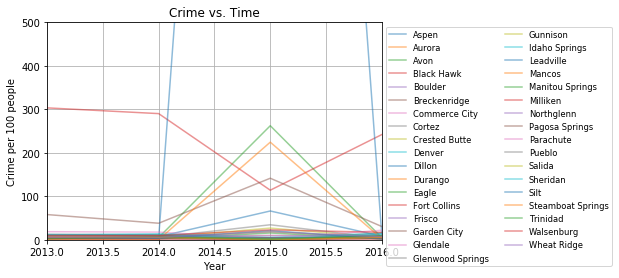

In [27]:
#Using a line graph to see the change in crime rate over time

import numpy as np

#Graphing
x_axis = np.arange(2013,2017,1)

fig, ax = plt.subplots()

ax.set_xlabel("Year")
ax.set_ylabel("Crime per 100 people")
ax.set_title("Crime vs. Time")
plt.xlim(2013,2016)
plt.ylim(0,500)


for d in city_list:
    plt.plot(x_axis, re_format_crime_drop[d], alpha=0.5, label=d)
    
ax.legend(bbox_to_anchor =(1,1), fontsize="small",fancybox=True,ncol=2)
ax.grid()
# Save the Figure
plt.savefig("City with Dispensaries crime rate timeline.png")
plt.show()

In [17]:
# Pivot the data frame to create table for graphing purpose
re_format_drug_crime = clean_store_crime.pivot_table("Crime realted to Drug per 100 Person", index=["Year"], columns=["City"])
# Dop city that doesn't have all four year data, and preview table
re_format_drug_crime_drop = re_format_drug_crime.dropna(axis='columns')
re_format_drug_crime_drop

City,Aspen,Aurora,Avon,Black Hawk,Boulder,Breckenridge,Commerce City,Cortez,Crested Butte,Denver,...,Pagosa Springs,Parachute,Pueblo,Salida,Sheridan,Silt,Steamboat Springs,Trinidad,Walsenburg,Wheat Ridge
Year,,,,,,,,,,,,,,,,,,,,,
2013,0.194465,0.520839,0.236742,33.613445,0.198390,0.218914,0.833333,0.059032,0.264901,0.451169,...,0.526316,0.545455,0.345172,0.635990,1.564626,0.033434,0.691206,0.575440,0.135135,0.420957
2014,0.385528,0.532273,0.560835,21.311475,0.625367,0.256575,0.689601,0.174662,0.523218,0.285699,...,1.396973,1.727273,0.348095,0.623396,2.228600,0.000000,0.751197,0.192100,0.310345,0.643170
2015,9.443064,0.002776,32.621810,11.718750,0.000000,0.000000,0.000000,3.707566,7.647815,0.082052,...,0.171527,1.450589,0.000919,0.000000,0.049850,3.399340,0.016240,0.025016,2.970989,1.779713
2016,0.274329,0.587759,0.244948,54.761905,0.874213,0.462684,0.576426,0.296770,0.562852,0.320345,...,0.453772,2.162162,0.529442,0.688905,1.259611,0.065168,0.775256,0.112641,0.661790,0.943006


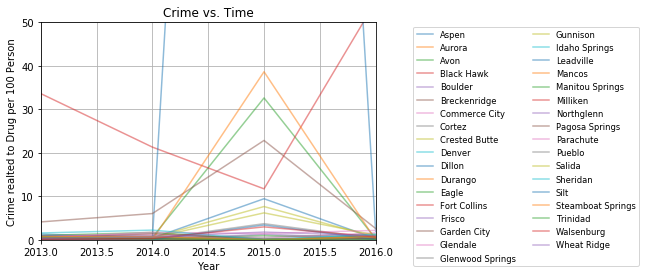

In [26]:
#Graphing
x_axis = np.arange(2013,2017,1)

fig, ax = plt.subplots()

ax.set_xlabel("Year")
ax.set_ylabel("Crime realted to Drug per 100 Person")
ax.set_title("Crime vs. Time")
plt.xlim(2013,2016)
plt.ylim(0,50)


for d in city_list:
    plt.plot(x_axis, re_format_drug_crime_drop[d], alpha=0.5, label=d)
    
ax.legend(bbox_to_anchor =(1.1,1), fontsize="small",fancybox=True,ncol=2)
ax.grid()
# Save the Figure
plt.savefig("City with Dispensaries vs drug related crime rate timeline.png")
plt.show()

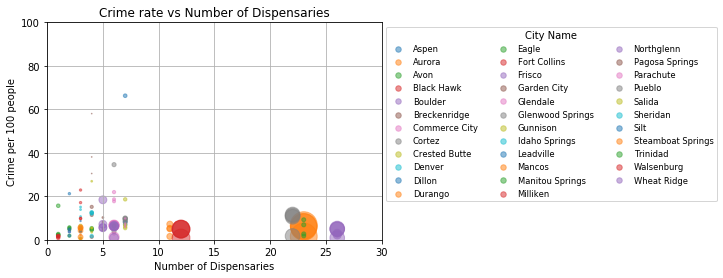

In [15]:
#Using a scatter plot to show the correlation between number of dispensary and crime in city
year=[2013,2014,2015,2016]
city_counter=[]
city_index=0

#Loop Through my city list
for d in city_list:
        temp_df = clean_store_crime.loc[(clean_store_crime["City"]==d)]
        crime_rate = temp_df["Crime Per 100 Person"]
        population =temp_df["Population"]
        number_dispensary = temp_df["Licensee"]
        plt.scatter(number_dispensary,crime_rate, s=population/500, marker="o", label=d,alpha=0.5)
        
        #Use this city counter to help me loop through the legend later
        city_counter.append(city_index)
        city_index=city_index+1
        
#Some basic beauty settings
plt.xlim(0,30)
plt.ylim(0,100)
plt.grid()
plt.xlabel("Number of Dispensaries")
plt.ylabel("Crime per 100 people")
plt.title("Crime rate vs Number of Dispensaries")           
lgnd = plt.legend(fontsize="small", mode="Expanded",
                numpoints=1, scatterpoints=1,
                loc=0, title="City Name",
                labelspacing=0.5,ncol=3,fancybox=True,bbox_to_anchor=(1,1))
#This part is just to make all the legend having same size mark size
for index in city_counter:
    lgnd.legendHandles[index]._sizes = [30]

plt.savefig("Crime Rate vs. Number of Dispensaries.png")